In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir('/content/drive/My Drive')

In [0]:
import pandas as pd

In [0]:
Data = pd.read_csv('shuffled-full-set-hashed.csv',header=None)

In [0]:
len(Data)

62204

In [0]:
Data.columns = ['Target','X']

In [0]:
set(Data.Target.values)

{'APPLICATION',
 'BILL',
 'BILL BINDER',
 'BINDER',
 'CANCELLATION NOTICE',
 'CHANGE ENDORSEMENT',
 'DECLARATION',
 'DELETION OF INTEREST',
 'EXPIRATION NOTICE',
 'INTENT TO CANCEL NOTICE',
 'NON-RENEWAL NOTICE',
 'POLICY CHANGE',
 'REINSTATEMENT NOTICE',
 'RETURNED CHECK'}

In [0]:
Data.dropna(inplace=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
ros = RandomOverSampler(random_state=0)
rus = RandomUnderSampler(random_state=0)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [0]:
CV = CountVectorizer()

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
X_data = CV.fit_transform(Data.X.values)

In [0]:
tT = TfidfTransformer()
X_normalized_data = tT.fit_transform(X_data)

In [0]:
Y_value = Data['Target'].values

In [0]:
X_normalized_data,Y_value = ros.fit_resample(X_normalized_data,Y_value)

In [0]:
d = {}
for i in Y_value:
  if i not in d:
    d[i]=1
  else:
    d[i] +=1

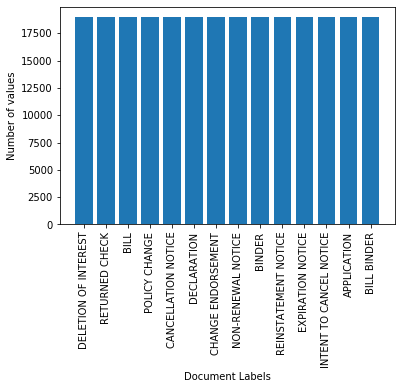

In [0]:
plt.xticks(rotation=90)
plt.xlabel('Document Labels')
plt.ylabel('Number of values')
plt.bar(d.keys(),d.values())
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_normalized_data,Y_value)

array(['DELETION OF INTEREST', 'DELETION OF INTEREST',
       'INTENT TO CANCEL NOTICE', ..., 'RETURNED CHECK',
       'EXPIRATION NOTICE', 'REINSTATEMENT NOTICE'], dtype=object)

In [0]:
# from sklearn.model_selection import train_test_split

In [0]:
# X_train,X_test,Y_train,Y_test = train_test_split(X_normalized_data,Data['Target'])

In [0]:
X_train.shape

(199069, 1037934)

In [0]:
X_test.shape

(66357, 1037934)

In [0]:
len(Y_train)

199069

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [0]:
lR = LogisticRegression()

In [0]:
lR.fit(X_train,Y_train)
y_pred = lR.predict(X_test)
accuracy_score(Y_test,y_pred),cross_val_score(lR,X_train,Y_train,cv=10)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


(0.9559503895595038,
 array([0.95278992, 0.95143388, 0.95183083, 0.95288563, 0.95122809,
        0.95348837, 0.95091686, 0.95171582, 0.95025626, 0.95045475]))

In [0]:
recall_score(Y_test,y_pred,average='macro')

0.954118441254101

In [0]:
dtC = DecisionTreeClassifier()
dtC.fit(X_train,Y_train)
y_pred = dtC.predict(X_test)
accuracy_score(Y_test,y_pred)

0.9719396597193966

In [0]:
recall_score(Y_test,y_pred,average='macro')

0.9719390935206661

In [0]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred = rf.predict(X_test)
accuracy_score(Y_test,y_pred),cross_val_score(rf,X_train,Y_train,cv=10)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.9762044697620447,
 array([0.97438602, 0.97227663, 0.97383093, 0.9723743 , 0.97222362,
        0.97332865, 0.9721678 , 0.97266744, 0.97080695, 0.97241345]))

In [0]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

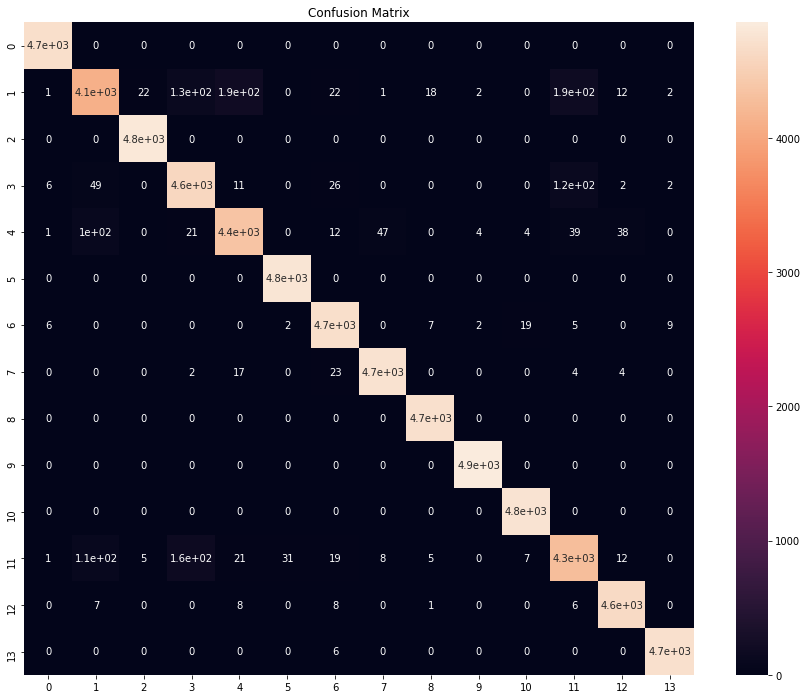

In [0]:
plt.figure(figsize=(15,12))
rf_mat = confusion_matrix(Y_test,y_pred)
rf_mat = np.round(rf_mat,1)
sns.heatmap(rf_mat,annot=True)
plt.title('Confusion Matrix')

plt.show()

In [0]:
t = list(set(Y_value))

In [0]:
t[1],t[3],t[11],t[4]

('EXPIRATION NOTICE',
 'REINSTATEMENT NOTICE',
 'INTENT TO CANCEL NOTICE',
 'CANCELLATION NOTICE')

In [0]:
recall_score(Y_test,y_pred,average='macro')

0.9758589019455323

In [0]:
len([i for i in y_pred==Y_test if i==True]),len(Y_test)

(64754, 66357)

In [0]:
mB = MultinomialNB()
mB.fit(X_train,Y_train)
y_pred = mB.predict(X_test)
accuracy_score(Y_test,y_pred)

0.8769082387690824

In [0]:
recall_score(Y_test,y_pred,average='macro')

0.8761227006856965

In [0]:
  recall_score(Y_test,y_pred,average='macro')

0.49173029219491593

In [0]:
from matplotlib import pyplot as plt

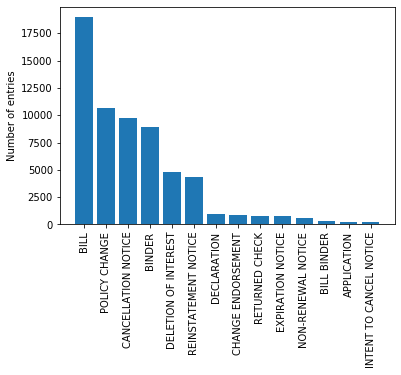

In [0]:
A = Data.Target.value_counts()
plt.xticks(rotation=90)
plt.ylabel('Number of entries')
plt.bar(A.index,A.values)
plt.show()

In [0]:
len(Data)

62159

In [0]:
s

'DarshanDarshan'